In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mci-2021/MCI_2021.csv


In [2]:
crimes=pd.read_csv('D:\\Divya\\Sem 5\\DA\\Project\\MCI_2021.csv')
crimes.head()

,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,246701,GO-20212596,D14,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,January,1,1,Friday,13,Assault,78,Kensington-Chinatown,-79.401107,43.652274
1,246702,GO-20211711,D52,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,...,January,1,1,Friday,1,Break and Enter,76,Bay Street Corridor,-79.383726,43.655716
2,246703,GO-20212771,D31,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,1610,200,Robbery - Mugging,...,January,1,1,Friday,13,Robbery,26,Downsview-Roding-CFB,-79.508595,43.720916
3,246704,GO-20212162,D41,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,...,January,1,1,Friday,8,Assault,125,Ionview,-79.273833,43.725777
4,246912,GO-202118253,D13,2021/01/01 05:00:00+00,2021/01/04 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1430,100,Assault,...,January,1,1,Friday,20,Assault,107,Oakwood Village,-79.447646,43.696259


In [3]:
crimes['occurrencedate'] = crimes['occurrencedate'].str[:10]
crimes['reporteddate'] = crimes['reporteddate'].str[:10] 

In [4]:
crimes['occurrencedate'] =  pd.to_datetime(crimes['occurrencedate'])
crimes['reporteddate'] =  pd.to_datetime(crimes['reporteddate'])

In [5]:
crimes.occurrencedayofweek = crimes.occurrencedayofweek.str.strip()
crimes['occurrencedayofweek'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [6]:
crimes.occurrencemonth = crimes.occurrencemonth.str.strip()
crimes['occurrencemonth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [7]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(1,len(sorter)+1)))
sorterIndex

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [8]:
sorter2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
sorterIndex2 = dict(zip(sorter2,range(1,len(sorter2)+1)))      
sorterIndex2

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [9]:
crimes['day_id'] = crimes.index
crimes['day_id'] = crimes['occurrencedayofweek'].map(sorterIndex)
crimes.head()

,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,day_id
0,246701,GO-20212596,D14,2021-01-01,2021-01-01,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,1,1,Friday,13,Assault,78,Kensington-Chinatown,-79.401107,43.652274,5
1,246702,GO-20211711,D52,2021-01-01,2021-01-01,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,...,1,1,Friday,1,Break and Enter,76,Bay Street Corridor,-79.383726,43.655716,5
2,246703,GO-20212771,D31,2021-01-01,2021-01-01,Other Commercial / Corporate Places (For Profi...,Commercial,1610,200,Robbery - Mugging,...,1,1,Friday,13,Robbery,26,Downsview-Roding-CFB,-79.508595,43.720916,5
3,246704,GO-20212162,D41,2021-01-01,2021-01-01,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,...,1,1,Friday,8,Assault,125,Ionview,-79.273833,43.725777,5
4,246912,GO-202118253,D13,2021-01-01,2021-01-04,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1430,100,Assault,...,1,1,Friday,20,Assault,107,Oakwood Village,-79.447646,43.696259,5


In [10]:
crimes["day_id"].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [11]:
crimes['month_id'] = crimes['occurrencemonth'].map(sorterIndex2)
crimes.head()

,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,day_id,month_id
0,246701,GO-20212596,D14,2021-01-01,2021-01-01,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,1,Friday,13,Assault,78,Kensington-Chinatown,-79.401107,43.652274,5,1
1,246702,GO-20211711,D52,2021-01-01,2021-01-01,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,...,1,Friday,1,Break and Enter,76,Bay Street Corridor,-79.383726,43.655716,5,1
2,246703,GO-20212771,D31,2021-01-01,2021-01-01,Other Commercial / Corporate Places (For Profi...,Commercial,1610,200,Robbery - Mugging,...,1,Friday,13,Robbery,26,Downsview-Roding-CFB,-79.508595,43.720916,5,1
3,246704,GO-20212162,D41,2021-01-01,2021-01-01,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,...,1,Friday,8,Assault,125,Ionview,-79.273833,43.725777,5,1
4,246912,GO-202118253,D13,2021-01-01,2021-01-04,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1430,100,Assault,...,1,Friday,20,Assault,107,Oakwood Village,-79.447646,43.696259,5,1


In [12]:
crimes["month_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
crimes["mci_category"].value_counts()

Assault            18671
Auto Theft          6541
Break and Enter     5717
Robbery             2280
Theft Over          1068
Name: mci_category, dtype: int64

In [14]:
crimes["day_id"].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [16]:
data=crimes

In [17]:
crimes = MultiColumnLabelEncoder(columns = ['premises_type','offence','Neighbourhood', "mci_category"]).fit_transform(crimes)


In [18]:
#crimes['Hood_ID'] = crimes['Hood_ID'].replace('NSA','141')

In [19]:
print(data['premises_type'].value_counts())
print(crimes['premises_type'].value_counts())

Outside        9402
Apartment      8610
Commercial     6274
House          5903
Other          2341
Transit        1156
Educational     591
Name: premises_type, dtype: int64
5    9402
0    8610
1    6274
3    5903
4    2341
6    1156
2     591
Name: premises_type, dtype: int64


In [20]:
print(data['Neighbourhood'].value_counts())
print(crimes['Neighbourhood'].value_counts())

Waterfront Communities-The Island    1528
Church-Yonge Corridor                1431
West Humber-Clairville                941
Moss Park                             919
Bay Street Corridor                   798
                                     ... 
Maple Leaf                             60
Princess-Rosethorn                     59
Guildwood                              54
Lambton Baby Point                     51
Woodbine-Lumsden                       48
Name: Neighbourhood, Length: 141, dtype: int64
123    1528
23     1431
125     941
79      919
6       798
       ... 
74       60
100      59
47       54
66       51
135      48
Name: Neighbourhood, Length: 141, dtype: int64


In [21]:
print(data['mci_category'].value_counts())
print(crimes['mci_category'].value_counts())

Assault            18671
Auto Theft          6541
Break and Enter     5717
Robbery             2280
Theft Over          1068
Name: mci_category, dtype: int64
0    18671
1     6541
2     5717
3     2280
4     1068
Name: mci_category, dtype: int64


Handling imbalanced datasets

In [22]:
# define X and y
feature_cols = ['premises_type', 'occurrenceyear', 'month_id', 
                'day_id', 'occurrencedayofyear', 'occurrencehour', 
                'Neighbourhood', 'Latitude', 'Longitude']
X = crimes[feature_cols]
y = crimes.mci_category

In [23]:
from imblearn.over_sampling import SMOTE
    
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)

Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

**MODELS**

**Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='entropy', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=300,
                       random_state=1)

In [27]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=1db12d15452837f714edb377aa0bd0a42e9f956cccf968c38da06402159993c9
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


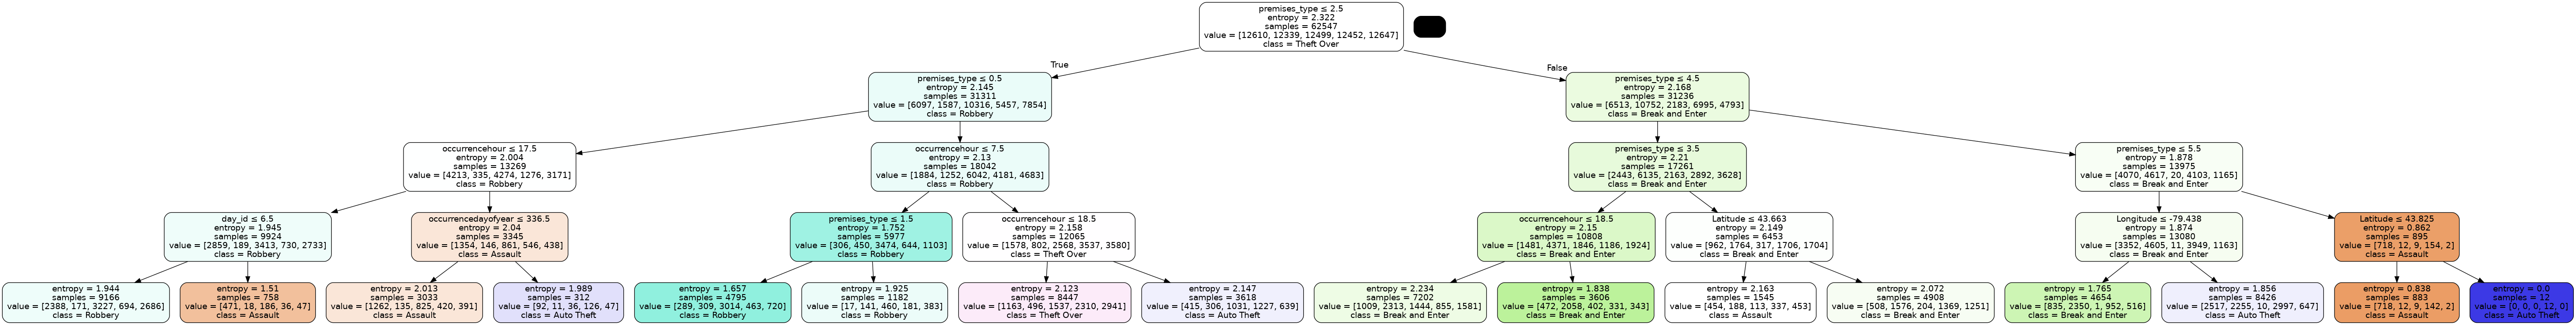

In [28]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline
import pylab, pydotplus
from six import StringIO

dot_data = StringIO() 
export_graphviz(treeclf, 
                out_file=dot_data, 
                feature_names=X_train.columns, 
                class_names=['Assault', 'Break and Enter', 
                             'Robbery', 'Auto Theft', 'Theft Over'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Feature Importance

In [29]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X_train.columns, 'importance':treeclf.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,premises_type,0.792211
5,occurrencehour,0.142518
8,Longitude,0.029033
7,Latitude,0.016985
3,day_id,0.014941
4,occurrencedayofyear,0.004311
1,occurrenceyear,0.000000
2,month_id,0.000000
6,Neighbourhood,0.000000


In [30]:
y_pred = treeclf.predict(X_test)
print(y_pred)

[2 3 1 ... 0 2 4]


Mean Square Error

In [31]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

2.7921319137886265

Accuracy

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[50, 300, 500, 600] }

treeclf = DecisionTreeClassifier(min_samples_split=300, 
                                 criterion='gini', max_depth=4, 
                                 random_state=1)

#treeclf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1), param_grid)                                 random_state=1), param_grid)

treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

In [33]:
metrics.accuracy_score(y_test, y_pred)

0.4063879511815113

Log-Loss

In [34]:
pred = treeclf.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.3622311447056537

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
#MCI_list=df["mci_category"].unique()
print(classification_report(y_test,y_pred))

Accuracy of Random Forest :  0.4063879511815113
[[1043 1238  573 1324 1883]
 [  61 3797  292 1311  871]
 [ 406  929 2616  520 1701]
 [ 316 1289  456 2083 2075]
 [ 147 1248 1059  589 2981]]
              precision    recall  f1-score   support

           0       0.53      0.17      0.26      6061
           1       0.45      0.60      0.51      6332
           2       0.52      0.42      0.47      6172
           3       0.36      0.33      0.35      6219
           4       0.31      0.49      0.38      6024

    accuracy                           0.41     30808
   macro avg       0.43      0.41      0.39     30808
weighted avg       0.43      0.41      0.40     30808



In [36]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 34.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=164c0f780427b8ea130fa60bf9322854dfc519322f31830f3b4cdf715dbbed5c
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created whe

In [37]:
'''
def dtree(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
#turning the arguments into a numpy array  

    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    #x = MultiColumnLabelEncoder(columns = ['premises_type','offence', 'Neighbourhood', "occurrencemonth"]).fit_transform(x)
    prediction = treeclf.predict(x.reshape(1, -1))

    return prediction
'''

'\ndef dtree(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):\n#turning the arguments into a numpy array  \n\n    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])\n    #x = MultiColumnLabelEncoder(columns = [\'premises_type\',\'offence\', \'Neighbourhood\', "occurrencemonth"]).fit_transform(x)\n    prediction = treeclf.predict(x.reshape(1, -1))\n\n    return prediction\n'

In [38]:
X_test

,premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude
53043,0,2021,10,4,294,2,123,43.641656,-79.381176
49042,1,2021,12,6,359,21,45,43.676703,-79.321490
46036,3,2021,7,7,192,20,130,43.712973,-79.455704
3030,3,2021,2,6,37,18,37,43.741566,-79.261023
90157,1,2021,11,5,332,7,55,43.714838,-79.559428
...,...,...,...,...,...,...,...,...,...
37882,2,2021,3,3,71,0,125,43.724680,-79.612635
55930,1,2021,7,3,188,0,79,43.650464,-79.371874
25329,0,2021,10,7,276,2,39,43.715951,-79.428965
11505,0,2021,5,4,140,0,18,43.699555,-79.502855


In [39]:
'''
import gradio as gr
outputs = gr.outputs.Textbox()
#labels
app = gr.Interface(fn=dtree, inputs=['text','text','text','text','text','text','text','text','text'], outputs=outputs,description="CRIME ANALYSIS: This is a decision tree model")
'''

'\nimport gradio as gr\noutputs = gr.outputs.Textbox()\n#labels\napp = gr.Interface(fn=dtree, inputs=[\'text\',\'text\',\'text\',\'text\',\'text\',\'text\',\'text\',\'text\',\'text\'], outputs=outputs,description="CRIME ANALYSIS: This is a decision tree model")\n'

In [40]:
#import warnings
#warnings.filterwarnings("ignore")
#app.launch(share=True)

In [41]:
'''
def inference(premises_type,occurrenceyear,occurrencemonth,day_id,occurrencedayofyear,occurrencehour,Hood_ID,Neighbourhood,Latitude,Longitude):
    s = 0 if sex=='female' else 1
    df = pd.DataFrame([[age, s, ch, cardio]], 
                      columns=['Age', 'Sex', 'Cholestoral (in mg/dl)', 
                               'Resting electrocardiographic results'])
    df = st.transform(df)
    pred = trainedmodel.predict_proba(df)[0]
    res = {'No Heart Desease': pred[0], 'Has Heart Desease': pred[1]}
    return res

sex = gr.inputs.Radio(['female', 'male'], label="Sex")
age = gr.inputs.Slider(minimum=1, maximum=100, default=22, label="Age")
ch = gr.inputs.Slider(minimum=120, maximum=560, default=200, label="Cholestoral (in mg/dl)")
cardio = gr.inputs.Radio([0, 1, 2], label="Resting electrocardiographic results")

gr.Interface(inference, [age, sex, ch, cardio], "label", live=True).launch(share=True)
'''

'\ndef inference(premises_type,occurrenceyear,occurrencemonth,day_id,occurrencedayofyear,occurrencehour,Hood_ID,Neighbourhood,Latitude,Longitude):\n    s = 0 if sex==\'female\' else 1\n    df = pd.DataFrame([[age, s, ch, cardio]], \n                      columns=[\'Age\', \'Sex\', \'Cholestoral (in mg/dl)\', \n                               \'Resting electrocardiographic results\'])\n    df = st.transform(df)\n    pred = trainedmodel.predict_proba(df)[0]\n    res = {\'No Heart Desease\': pred[0], \'Has Heart Desease\': pred[1]}\n    return res\n\nsex = gr.inputs.Radio([\'female\', \'male\'], label="Sex")\nage = gr.inputs.Slider(minimum=1, maximum=100, default=22, label="Age")\nch = gr.inputs.Slider(minimum=120, maximum=560, default=200, label="Cholestoral (in mg/dl)")\ncardio = gr.inputs.Radio([0, 1, 2], label="Resting electrocardiographic results")\n\ngr.Interface(inference, [age, sex, ch, cardio], "label", live=True).launch(share=True)\n'

**Gaussian Naive Bayes**

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=3), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [44]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
30.66%



In [45]:
pred = std_clf.predict_proba(X_test)
eval = metrics.log_loss(y_test,pred) 
eval

1.5559157135999546

In [46]:
# Extract PCA from pipeline
pca_std = std_clf.named_steps['pca']

In [47]:
# Show first principal components
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 with scaling:
 [-8.30204672e-02 -1.66533454e-16 -5.65427330e-01  1.11694841e-02
 -5.62984553e-01 -3.55446016e-02  4.25892673e-02 -4.20360487e-01
  4.20170167e-01]


In [48]:
print("Accuracy of Gaussian Naive Bayes : ",accuracy_score(y_test, pred_test_std))
print(confusion_matrix(y_test, pred_test_std)) 
print(classification_report(y_test,pred_test_std))

Accuracy of Gaussian Naive Bayes :  0.30660867307192935
[[   5 3018 2313  169  556]
 [   1 4289 1427  259  356]
 [   0 1292 4228  220  432]
 [   1 3635 1642  293  648]
 [   0 2205 2982  206  631]]
              precision    recall  f1-score   support

           0       0.71      0.00      0.00      6061
           1       0.30      0.68      0.41      6332
           2       0.34      0.69      0.45      6172
           3       0.26      0.05      0.08      6219
           4       0.24      0.10      0.15      6024

    accuracy                           0.31     30808
   macro avg       0.37      0.30      0.22     30808
weighted avg       0.37      0.31      0.22     30808



**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight=None)
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
#y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [51]:
print("Accuracy of Logistic Regression : ",accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred)) 
#MCI_list=df["mci_category"].unique()
print(classification_report(y_test,y_test_pred))

Accuracy of Logistic Regression :  0.28846403531550247
[[ 758 1413 1568 1379  943]
 [ 482 2004 1441 1765  640]
 [ 695  156 3016 1158 1147]
 [ 675 1665 1207 1747  925]
 [ 653  672 2049 1288 1362]]
              precision    recall  f1-score   support

           0       0.23      0.13      0.16      6061
           1       0.34      0.32      0.33      6332
           2       0.32      0.49      0.39      6172
           3       0.24      0.28      0.26      6219
           4       0.27      0.23      0.25      6024

    accuracy                           0.29     30808
   macro avg       0.28      0.29      0.28     30808
weighted avg       0.28      0.29      0.28     30808



**K-Nearest Neighbor**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=300)

In [53]:
knn_pred = knn.predict(X_test)

In [54]:
print("Accuracy of KNN : ",accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred)) 
print(classification_report(y_test,knn_pred))

Accuracy of KNN :  0.3290703713321215
[[ 803  924  999 1496 1839]
 [ 653 1491 1080 1474 1634]
 [ 537  631 2160 1024 1820]
 [ 721  895  769 2208 1626]
 [ 346  527  809  866 3476]]
              precision    recall  f1-score   support

           0       0.26      0.13      0.18      6061
           1       0.33      0.24      0.28      6332
           2       0.37      0.35      0.36      6172
           3       0.31      0.36      0.33      6219
           4       0.33      0.58      0.42      6024

    accuracy                           0.33     30808
   macro avg       0.32      0.33      0.31     30808
weighted avg       0.32      0.33      0.31     30808



**Ensemble Methods**

*Combining multiple learning algorithm together to achieve better performance over a single algorithm.* 

*Random forest*

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(criterion='gini',
                             min_samples_split=500,
                            n_estimators=150,
                            n_jobs=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=500, n_estimators=150, n_jobs=2)

In [57]:
rfc_pred = rfc.predict(X_test)
accuracy_score(rfc_pred, y_test)

0.49461178914567644

In [58]:
print("Accuracy of Random Forest Ensemble Model : ",accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, rfc_pred)) 
print(classification_report(y_test,rfc_pred))

Accuracy of Random Forest Ensemble Model :  0.3290703713321215
[[2466 1200  772  736  887]
 [ 404 4459  339  659  471]
 [ 750  552 3102  549 1219]
 [ 882 1260  609 2502  966]
 [ 467 1114 1128  606 2709]]
              precision    recall  f1-score   support

           0       0.50      0.41      0.45      6061
           1       0.52      0.70      0.60      6332
           2       0.52      0.50      0.51      6172
           3       0.50      0.40      0.44      6219
           4       0.43      0.45      0.44      6024

    accuracy                           0.49     30808
   macro avg       0.49      0.49      0.49     30808
weighted avg       0.49      0.49      0.49     30808



**Adaboost**

*Adaboost or Adaptive Boosting is a boosting algorithm. Adaboost combines several weak learners to produce a stronger model. The final output is obtained from the weighted sum of the weak models.(Sequential)*

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=100, 
                         learning_rate=0.1, 
                         random_state=0)

In [61]:
ada = ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

In [62]:
print("Accuracy of Adaboost : ",accuracy_score(y_test, ada_pred))
print(confusion_matrix(y_test, ada_pred)) 
print(classification_report(y_test,ada_pred))

Accuracy of Adaboost :  0.40749156063360165
[[1031 1450 2072  835  673]
 [ 179 4457  495  722  479]
 [ 173  621 4318  255  805]
 [ 304 2030 1743 1226  916]
 [ 103 1279 2607  513 1522]]
              precision    recall  f1-score   support

           0       0.58      0.17      0.26      6061
           1       0.45      0.70      0.55      6332
           2       0.38      0.70      0.50      6172
           3       0.35      0.20      0.25      6219
           4       0.35      0.25      0.29      6024

    accuracy                           0.41     30808
   macro avg       0.42      0.40      0.37     30808
weighted avg       0.42      0.41      0.37     30808



In [63]:
def dtree(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
#turning the arguments into a numpy array  

    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    #x = MultiColumnLabelEncoder(columns = ['premises_type','offence', 'Neighbourhood', "occurrencemonth"]).fit_transform(x)
    prediction = treeclf.predict(x.reshape(1, -1))

    return prediction

def bayes(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
        x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
        prediction = std_clf.predict(x.reshape(1, -1))

        return prediction
    
def reg(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    prediction = logreg.predict(x.reshape(1, -1))

    return prediction

def knn_fn(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    prediction = knn.predict(x.reshape(1, -1))

    return prediction

def ensemble_fn(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    prediction = rfc.predict(x.reshape(1, -1))

    return prediction

def adaboost_fn(premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
    x = np.array([premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude])
    prediction = ada.predict(x.reshape(1, -1))

    return prediction


In [64]:
import gradio as gr
outputs = gr.outputs.Textbox()
#labels

app = gr.Interface(fn=ensemble_fn, inputs=['text','text','text','text','text','text','text','text'], outputs=outputs,description="CRIME ANALYSIS")
app.launch(share=True)

/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/utils.py:764: UserWarning: Expected 9 arguments for function <function ensemble_fn at 0x7feb0b72b440>, received 8.
  f"Expected {max_args} arguments for function {fn}, received {arg_count}."
/opt/conda/lib/python3.7/site-packages/gradio/utils.py:768: UserWarning: Expected at least 9 arguments for function <function ensemble_fn at 0x7feb0b72b440>, received 8.
  f"Expected at least {min_args} arguments for function {fn}, received 

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://8e30c26544dff6d4.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7feac5c1ea10>,
 'http://127.0.0.1:7860/',
 'https://8e30c26544dff6d4.gradio.app')

In [65]:
X_test

,premises_type,occurrenceyear,month_id,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude
53043,0,2021,10,4,294,2,123,43.641656,-79.381176
49042,1,2021,12,6,359,21,45,43.676703,-79.321490
46036,3,2021,7,7,192,20,130,43.712973,-79.455704
3030,3,2021,2,6,37,18,37,43.741566,-79.261023
90157,1,2021,11,5,332,7,55,43.714838,-79.559428
...,...,...,...,...,...,...,...,...,...
37882,2,2021,3,3,71,0,125,43.724680,-79.612635
55930,1,2021,7,3,188,0,79,43.650464,-79.371874
25329,0,2021,10,7,276,2,39,43.715951,-79.428965
11505,0,2021,5,4,140,0,18,43.699555,-79.502855


In [66]:
y_test

53043    2
49042    2
46036    1
3030     0
90157    4
        ..
37882    1
55930    2
25329    2
11505    0
31490    0
Name: mci_category, Length: 30808, dtype: int64

In [67]:
def inference(premises_type,occurrenceyear,occurrencemonth,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude):
    s = 0 if sex=='female' else 1
    df = pd.DataFrame([[premises_type,occurrenceyear,occurrencemonth,day_id,occurrencedayofyear,occurrencehour,Hood_ID,Neighbourhood,Latitude,Longitude]], 
                      columns=['premises_type','occurrenceyear','occurrencemonth','day_id','occurrencedayofyear','occurrencehour','Hood_ID','Neighbourhood','Latitude','Longitude'])
    #df = st.transform(df)
    pred = ensemble_fnl.predict_proba(df)[0]
    #res = {'No Heart Desease': pred[0], 'Has Heart Desease': pred[1]}
    return res

premises_type=gr.inputs.Radio(['0', '1','2','3','4','5'], label="premises_type")
occurrenceyear=gr.inputs.Dropdown(['2021'], label="occurrenceyear")
occurrencemonth=gr.inputs.Textbox()
day_id=gr.inputs.Textbox()
occurrencedayofyear=gr.inputs.Textbox()
occurrencehour=gr.inputs.Textbox()
Neighbourhood=gr.inputs.Textbox()
Latitude=gr.inputs.Textbox()
Longitude=gr.inputs.Textbox()

outputs = gr.outputs.Textbox()

gr.Interface(inference, [premises_type,occurrenceyear,occurrencemonth,day_id,occurrencedayofyear,occurrencehour,Neighbourhood,Latitude,Longitude], outputs=outputs, live=True).launch(share=True)

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please i

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://78318bc50822ebef.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7feac30560d0>,
 'http://127.0.0.1:7861/',
 'https://78318bc50822ebef.gradio.app')